In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import cv2
import os

In [12]:
path_parent =os.path.dirname(os. getcwd())
os.chdir(path_parent)

In [13]:
from preprocessing.dane import *

C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\gesty\model_dt


In [14]:
#ustawienie wlasciwego ksztaltu danych wejsciowych
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [16]:
#definicja tensoboard callback
log_dir = "logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:
log_dir

'logs\\20211029-184335'

In [71]:
#definicja modelu

def create_model(X, Y,filters, dropout: float, units, class_num, lr = 0.001, epochs = 20, batch = 256, plot = True  ):
    
    '''
    X - our training dataset without labels,
    Y - labels from our training dataset
    filters - list of filters,
    dropout - value, float, representing size of dropout after each convolution layer,
    units - list of units in DenseLayer,
    class_num - how many classes we have in our dataset
    lr - learning rate used in optimizer "Adam", default 0.001,
    epochs - number of epoch
    batch - batch size, default 256
    plot - if True then print plot
    '''
    model = tf.keras.Sequential()
    
    model.add(layers.InputLayer(input_shape= X.shape[1:]))
    
    for i, j in enumerate(filters):
        model.add(layers.Conv2D(
            filters = j,
            kernel_size = (3,3),
            strides = 1,
            padding = 'same', 
            activation = 'relu',
            input_shape = (-1,28,28,1)))  
        
        model.add(layers.MaxPool2D(
            pool_size = 2,
            strides = 2,
            padding = 'same',
            name = "warstwaCNN" + str(i)))
    
        model.add(layers.Dropout(dropout))
        
    model.add(layers.Flatten())
    
    for a,b in enumerate(units):
        model.add(layers.Dense(
            b,
            activation = 'relu',
            name = "warstwa_gesta" + str(a)))
        
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(class_num, name = 'wyjscie'))
    model.add(layers.Softmax())
    
    print(model.summary())
    
                  
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
                  
    model.compile(
            optimizer = opt,
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
        
    results = model.fit(
            X,
            Y,
            epochs = epochs,
            batch_size = batch,
            validation_split= 0.2,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience= 3),
                        tensorboard_callback])
    
    if plot == True:
        plt.figure(figsize = (15,7))
        plt.plot(results.history['accuracy'], label = 'train')
        plt.plot(results.history['val_accuracy'], label = 'val')
        plt.show()
    else:
        None
    
    return model               

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
warstwaCNN0 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
warstwaCNN1 (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)             

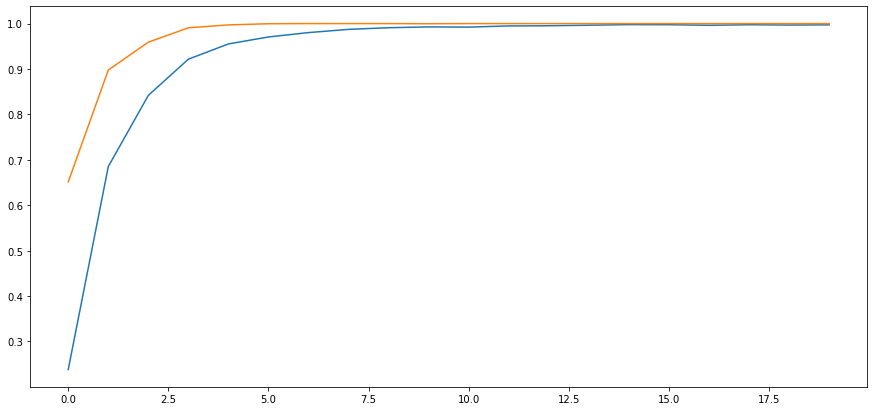

In [15]:
#wywolanie modelu
model1 = create_model(X_train, Y_train,[32, 64], 0.1,[256,64],24)

Jak widzimy nasz model osiagnał bardzo wysoka dokladnosc na zbiorze treningowym i walidacyjnym juz w 5 epoce.  
Sprawdzmy jakie wyniki uzyskamy na zbiorze testowym

In [16]:
#predykcja
y_pred1 = model1.predict(X_test).argmax(axis = 1)

print(classification_report(Y_test.argmax(axis = 1), y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.95      0.97       432
           2       1.00      0.93      0.96       310
           3       0.86      1.00      0.92       245
           4       0.96      1.00      0.98       498
           5       1.00      1.00      1.00       247
           6       0.94      0.97      0.96       348
           7       0.99      0.95      0.97       436
           8       0.93      0.93      0.93       288
           9       0.98      0.93      0.96       331
          10       0.94      1.00      0.97       209
          11       1.00      0.89      0.94       394
          12       0.92      0.79      0.85       291
          13       0.92      1.00      0.96       246
          14       0.99      1.00      1.00       347
          15       0.99      1.00      1.00       164
          16       0.79      0.72      0.75       144
          17       0.89    

In [17]:
acc1 = accuracy_score(y_pred1, Y_test.argmax(axis = 1))
print('model1 accuracy = ', round(acc1,2))

model1 accuracy =  0.94


In [5]:
#wywolanie modelu2
model2 = create_model(X_train, Y_train,[32, 64,128], 0.1,[256,64],24, plot = False)

#predykcja
y_pred2 = model2.predict(X_test).argmax(axis = 1)

acc2 = accuracy_score(y_pred2, Y_test.argmax(axis = 1))
print('model2 accuracy = ', round(acc2,2))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
warstwaCNN0 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
warstwaCNN1 (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [7]:
#wywolanie modelu3
model3 = create_model(X_train, Y_train,[32, 64,128], 0.1,[512,256,64],24, plot = False)

#predykcja
y_pred3 = model3.predict(X_test).argmax(axis = 1)

acc3 = accuracy_score(y_pred3, Y_test.argmax(axis = 1))
print('model3 accuracy = ', round(acc3,2))

model3 accuracy =  0.94


Jak widzimy, dodawanie kolejnych wartstw gestych nie poprawia wyniku.

In [14]:
#wywolanie modelu4
model4 = create_model(X_train, Y_train,[32, 64, 128], 0.2,[256,64],24, plot = False)

#predykcja
y_pred4 = model4.predict(X_test).argmax(axis = 1)

acc4 = accuracy_score(y_pred4, Y_test.argmax(axis = 1))
print('model4 accuracy = ', round(acc4,2))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
warstwaCNN0 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
warstwaCNN1 (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)        

Zwiększając współczynnik dropoutu uzyskaliśmy całkiem dobry wynik na zbiorze testowym, 0.98

In [146]:
#wywolanie modelu 5
model5 = create_model(X_train, Y_train,[32, 64, 128], 0.3,[256,64],24, plot = False)

#predykcja
y_pred5 = model5.predict(X_test).argmax(axis = 1)

acc5 = accuracy_score(y_pred5, Y_test.argmax(axis = 1))
print('model5 accuracy = ', round(acc5,2))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
warstwaCNN0 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
warstwaCNN1 (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 128)        

Kolejne podwyzszenie dropout nie poprawilo nam wyników, spróbujmy jesszcze zastosować residual blocks

In [181]:
#wywolanie modelu 6
model6 = create_model(X_train, Y_train,[32, 64, 128 ,256], 0.2,[512,128],24, plot = False)

#predykcja
y_pred6 = model6.predict(X_test).argmax(axis = 1)

acc6 = accuracy_score(y_pred6, Y_test.argmax(axis = 1))
print('model6 accuracy = ', round(acc6,2))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
warstwaCNN0 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
warstwaCNN1 (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 128)       

Dodając kolejną warstwe Conv2D nasz model nie poprawia dokładnosci, w kolejnym kroku sprobujmy wykorzystać metodę residual blocks

In [227]:
#definicja residual block:

def res_block(input_, filters):
    for i, j in enumerate(filters):
        if i ==0:
            x_1 = tf.keras.layers.Conv2D(filters= j, kernel_size = (3,3), padding = 'same')(input_)
            x_1 = tf.keras.layers.ReLU()(x_1)
            x_1 = tf.keras.layers.BatchNormalization()(x_1)
            x_2 = tf.keras.layers.Conv2D(filters=j, kernel_size=(3,3), padding="same")(x_1)
        else:
            x_1 = tf.keras.layers.Conv2D(filters=j, kernel_size = (3,3), padding = 'same')(x_1)
            x_1 = tf.keras.layers.ReLU()(x_1)
            x_1 = tf.keras.layers.BatchNormalization()(x_1)
            x_2 = tf.keras.layers.Conv2D(filters=j, kernel_size=(3,3), padding="same")(x_1)  
    
    output = tf.keras.layers.Add()([input_, x_2])
    output = tf.keras.layers.ReLU()(output)
    output = tf.keras.layers.BatchNormalization()(output)
    
    return output

In [228]:
#konstrukcja modelu 
input_shape = (28,28,1)

input_layer = tf.keras.Input(shape=input_shape, dtype=tf.float32)

resblock = res_block(input_layer, [32,64])

avg_pool = tf.keras.layers.GlobalAveragePooling2D()(resblock)

droput = tf.keras.layers.Dropout(0.2)(avg_pool)

out = tf.keras.layers.Dense(24)(droput)
out = tf.keras.layers.Softmax()(out)

model7 = tf.keras.Model(
    inputs = input_layer,
    outputs = out,
    name="model_with_residual_block"
)


In [229]:
model7.summary()

Model: "model_with_residual_block"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 28, 28, 32)   320         input_27[0][0]                   
__________________________________________________________________________________________________
re_lu_38 (ReLU)                 (None, 28, 28, 32)   0           conv2d_72[0][0]                  
__________________________________________________________________________________________________
batch_normalization_39 (BatchNo (None, 28, 28, 32)   128         re_lu_38[0][0]                   
__________________________________________________________________________

In [230]:
#trening i walidacja

model7.compile(
    optimizer='Adam',
    loss=  'categorical_crossentropy',
    metrics=["accuracy"]
)

epochs = 30
patience = 3
history = model7.fit(
    X_train, 
    Y_train,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=patience)
    ]
)


Epoch 1/30
687/687 [==============================] - 219s 313ms/step - loss: 1.7097 - accuracy: 0.5227 - val_loss: 3.7878 - val_accuracy: 0.1674
Epoch 2/30
687/687 [==============================] - 215s 313ms/step - loss: 0.5949 - accuracy: 0.8615 - val_loss: 1.4017 - val_accuracy: 0.5851
Epoch 3/30
687/687 [==============================] - 215s 314ms/step - loss: 0.2637 - accuracy: 0.9512 - val_loss: 2.4634 - val_accuracy: 0.4782
Epoch 4/30
687/687 [==============================] - 221s 321ms/step - loss: 0.1326 - accuracy: 0.9807 - val_loss: 0.1819 - val_accuracy: 0.9536
Epoch 5/30
687/687 [==============================] - 228s 332ms/step - loss: 0.0795 - accuracy: 0.9893 - val_loss: 0.1536 - val_accuracy: 0.9563
Epoch 6/30
687/687 [==============================] - 244s 355ms/step - loss: 0.0448 - accuracy: 0.9960 - val_loss: 0.7272 - val_accuracy: 0.7835
Epoch 7/30
687/687 [==============================] - 216s 315ms/step - loss: 0.0475 - accuracy: 0.9924 - val_loss: 1.4104 -

In [231]:
#predykcja
y_pred7 = model7.predict(X_test).argmax(axis = 1)

acc7 = accuracy_score(y_pred7, Y_test.argmax(axis = 1))
print('model7 accuracy = ', round(acc7,2))

model7 accuracy =  0.86


Nasz model nie poprawił swojej dokładnosci przy zastosowaniu residuals block

**Augmentacja danych**

In [128]:
# poszerzmy nasz zbior o augmentacje
## dodajmy nowe obserwacje obrócone w poziomie 

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical")
])

data_augmentation1 = tf.keras.Sequential([
  layers.RandomRotation(0.5),
  layers.RandomFlip("horizontal_and_vertical")
])

augmentation =  lambda x, y: (data_augmentation(x, training=True), y)
augmentation1 =  lambda x, y: (data_augmentation1(x, training=True), y)

AUG = augmentation(X_train,Y_train)
AUG1 = augmentation1(X_train,Y_train)

In [129]:
#przekonwertujmy to do array
X_train_1 = AUG[0]
Y_train_1 = AUG[1]

X_train_2 = AUG1[0]
Y_train_2 = AUG1[1]

# połaczmy z naszym zbiorem X_train i Y_train

In [130]:
X_train_aug = np.vstack([X_train, X_train_1,X_train_2])
Y_train_aug =np.vstack([Y_train, Y_train_1, Y_train_2])

**Wywołanie modelu na danych z augmentacja**

In [137]:
#wywolanie modelu 7
model7 = create_model(X_train, Y_train,[32, 64, 128], 0.5,[256,64],24, plot = False)

#predykcja
y_pred7 = model7.predict(X_test).argmax(axis = 1)

acc7 = accuracy_score(y_pred7, Y_test.argmax(axis = 1))
print('model7 accuracy = ', round(acc7,2))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
warstwaCNN0 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
warstwaCNN1 (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)       

Podwyższony dropout i augmentacja danych nie podwyzszyła naszej osiaganego skutecznosci 

**Prezentacja wyników modeli w tensorboard**

In [43]:
%reload_ext tensorboard
%tensorboard --logdir "logs"

Reusing TensorBoard on port 6006 (pid 160), started 1 day, 16:58:01 ago. (Use '!kill 160' to kill it.)

**Zapiszmy nasz najlepszy model**

In [212]:
#najlepszym modelem okazał się model4
model4.save("model_dt/model_dt.h5")


In [180]:
# w dokumentacji napisz jaki to data set, skad pochodzi, daj obrazek, ze nie wszystkie litery sa
#dokumentacje po angielsku
